In [1]:
import sys
from pathlib import Path

module_path = str(Path().resolve().parent / "src")

if module_path not in sys.path:
    sys.path.append(module_path)

from semiring_geometry import nsr
INF = nsr.INF

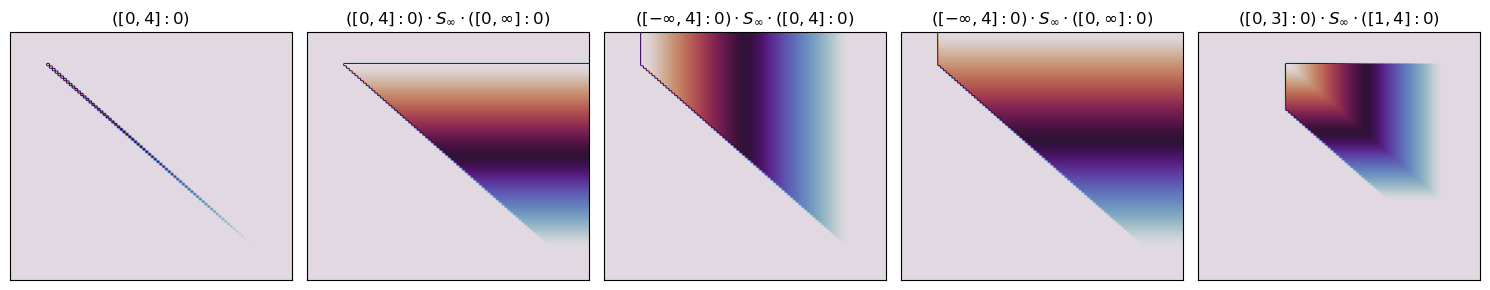

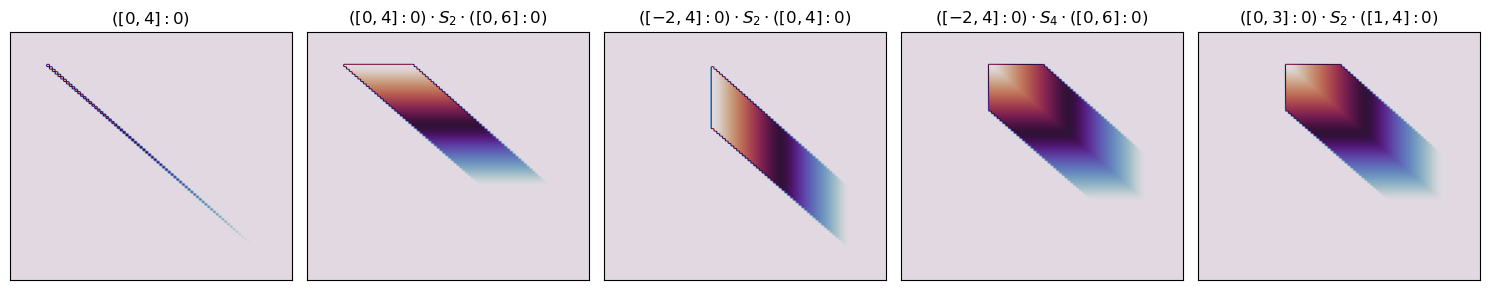

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# plt.rcParams['text.usetex'] = True

INF = nsr.INF

def get_ascii_diagram(element) -> str:

    boundary = element.get_boundary()
    points = [p for p in boundary if INF not in p and -INF not in p]
    # print(points)

    if len(points) > 0:

        start = min([p[0] for p in points])
        stop = max([p[1] for p in points])

        border = (stop - start) / 6
        start, stop = start - border, stop + border
    else:
        start, stop = 0, 10

    indices = np.linspace(start, stop, num=25)

    diagram = ""
    for i in indices:
        for j in indices:
            value = f"{element.get_entry(i, j)} "
            # print(f"{i = }, {j = } : {value = }")

            if element.get_entry(i, j) > 0:
                value = "*"
            else:
                value = "-"

            diagram += value
        diagram += "\n"

    return diagram

def display(matrices, titles):
    num_matrices = len(matrices)

    fig, axes = plt.subplots(1, num_matrices, figsize = (3 * num_matrices, 3))

    if num_matrices == 1:
        axes = [axes]

    for i, matrix in enumerate(matrices):
        matrix_np = np.array(matrix)

        im = axes[i].imshow(matrix_np, cmap="twilight", aspect="auto")
        axes[i].set(yticklabels=[]) 
        axes[i].set(xticklabels=[]) 
        axes[i].tick_params(left = False, bottom = False)
        axes[i].set_title(titles[i])
        # fig.colorbar(im, ax = axes[i])

    plt.tight_layout()
    plt.show()

def get_heat_map(element):
    boundary = element.get_boundary()
    # print(boundary)
    points = [p for p in boundary if INF not in p and -INF not in p]

    if len(points) > 0:

        start = min([p[0] for p in points])
        stop = max([p[1] for p in points])

        border = (stop - start) / 6
        start, stop = start - border, stop + border
    else:
        start, stop = 0, 10

    indices = np.linspace(start, stop, num=100)


    array = [[] for k in indices]
    for idx, i in enumerate(indices):
        for idy, j in enumerate(indices):
            value = element.get_entry(i, j)
            array[idx].append(value)
    
    # plt.imshow(array, cmap='twilight', interpolation='nearest')
    # plt.axis('off')
    # plt.show()

    return array

# diagram = get_ascii_diagram(nsr.Contact(1, 2, 5))
# element = nsr.Contact(1, 2, 5)
# element = nsr.Storage(4) * nsr.Contact(0, 1, 0)
# diagram = get_ascii_diagram(element)
# print(diagram)

elements = [
nsr.Storage(),
nsr.Contact.identity(),
nsr.Storage.identity(),
nsr.Contact(1, 2, 5),
nsr.Storage() * nsr.Contact(0, 1, 0),
nsr.Storage(4) * nsr.Contact(0, 2, 0),
nsr.Contact(0, 4, 2) * nsr.Storage(1) * nsr.Contact(0, 4, 0),
nsr.Contact(-INF, 4, 2) * nsr.Storage(3) * nsr.Contact(0, INF, 0),
nsr.Contact(0, 4, 0) * nsr.Storage(4) * nsr.Contact(2, 6, 2),
]
# get_heat_map(element);

elements = [
    nsr.Contact(0, 4, 0),
    nsr.Contact(0, 4, 0) * nsr.Storage(),
    nsr.Storage() * nsr.Contact(0, 4, 0),
    nsr.Storage() * nsr.Contact(0, 4, 0) * nsr.Storage(),
    nsr.Contact(0, 3, 0) * nsr.Storage() * nsr.Contact(1, 4, 0),
    #
    nsr.Contact(0, 4, 0),
    nsr.Contact(0, 4, 0) * nsr.Storage(2),
    nsr.Storage(2) * nsr.Contact(0, 4, 0),
    nsr.Storage(2) * nsr.Contact(0, 4, 0) * nsr.Storage(2),
    nsr.Contact(0, 3, 0) * nsr.Storage(2) * nsr.Contact(1, 4, 0)
]

heat_maps = []
titles = []
for element in elements:
    heat_maps.append(get_heat_map(element))
    titles.append(f"${element}$")

# display(heat_maps, titles)
display(heat_maps[:5], titles[:5])
display(heat_maps[5:], titles[5:])